In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the datasets
X_train = pd.read_csv('/Preprocessed_X_train.csv')
X_test = pd.read_csv('/Preprocessed_X_test.csv')
y_train = pd.read_csv('/Preprocessed_y_train.csv')
y_train = y_train.iloc[:, 0]
y_test = pd.read_csv('/Preprocessed_y_test.csv')
y_test = y_test.iloc[:, 0]

# Top 20 features from Preprocessed data

In [ ]:
#Top 20 from preprocessed data

Preprocessed_features = [
    'overall_score', 'position_score', 'height', 'weight', 'age', 'Ball Control',
    'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression', 'Reactions',
    'Att. Position', 'Interceptions', 'Vision', 'Composure', 'Crossing',
    'Short Pass', 'Long Pass', 'Acceleration', 'Stamina', 'Strength', 'Balance',
    'Sprint Speed', 'Agility', 'Jumping'
]

X_Preprocessed_train = X_train[Preprocessed_features]
X_Preprocessed_test = X_test[Preprocessed_features]

    # Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_Preprocessed_train)
X_test_scaled = scaler.transform(X_Preprocessed_test)

    # Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

    # Make predictions
y_pred = model.predict(X_test_scaled)

    # Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

    # Get feature importance
feature_importance1 = pd.DataFrame({
                      'Feature': X_Preprocessed_train.columns,
                      'Coefficient': model.coef_
                      }).sort_values('Coefficient', ascending=False)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Print model performance
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("\nTop 20 Most Important Features:")
print(feature_importance1.head(20))

Mean Squared Error: 202.77
R² Score: 0.39

Top 20 Most Important Features:
           Feature  Coefficient
0    overall_score    11.305619
8     Stand Tackle     2.018594
10       Reactions     1.536659
11   Att. Position     1.322073
14       Composure     1.307327
2           height     1.178327
20        Strength     1.042938
21         Balance     0.986385
9       Aggression     0.824704
22    Sprint Speed     0.751559
15        Crossing     0.699070
13          Vision     0.655831
18    Acceleration     0.514912
1   position_score     0.337494
12   Interceptions     0.282151
17       Long Pass     0.177582
6        Dribbling    -0.062343
3           weight    -0.275415
16      Short Pass    -0.750569
23         Agility    -1.173880



Top 20 Features:


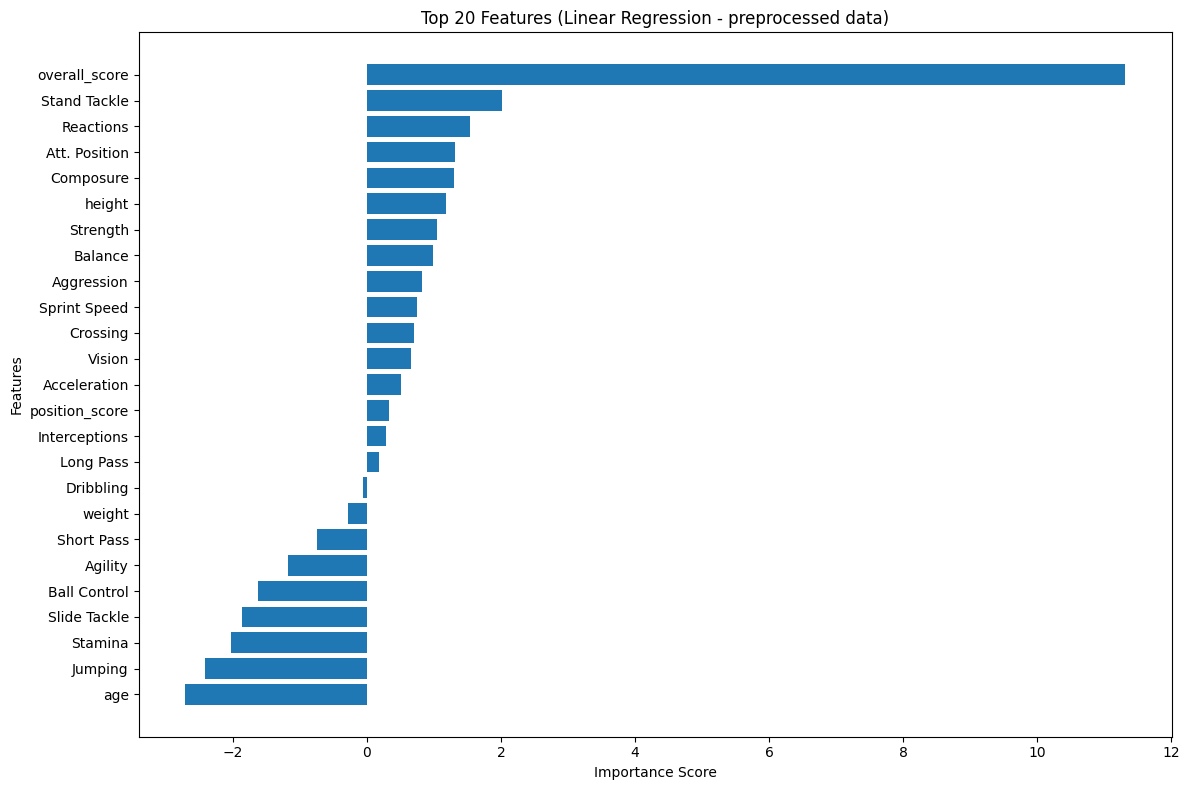

<ipython-input-43-731a3581d00d>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()],


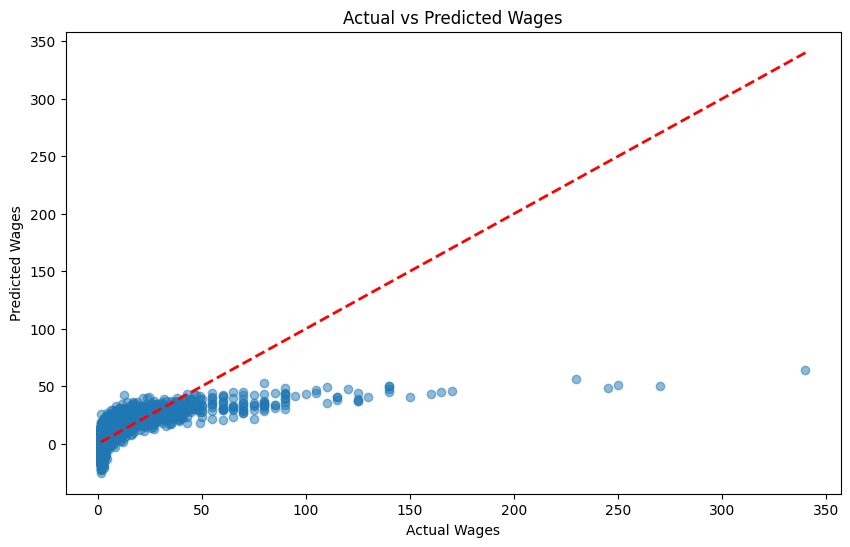

In [ ]:
print("\nTop 20 Features:")
# print(top_features)

# Plot the Top 20 Features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance1['Feature'][::-1], feature_importance1['Coefficient'][::-1])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Features (Linear Regression - preprocessed data)')
plt.tight_layout()
plt.show()

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2, color='red')
plt.title("Actual vs Predicted Wages")
plt.xlabel("Actual Wages")
plt.ylabel("Predicted Wages")
plt.show()

#XGBoost selected Top 20 features

In [ ]:
#top 20 XGBoost selected features

XGBoost_features = ['Ball Control', 'Dribbling', 'Slide Tackle', 'Stand Tackle', 'Aggression',
                 'Reactions', 'Att. Position', 'Interceptions', 'Vision', 'Composure',
                 'Crossing', 'Short Pass', 'Long Pass', 'Acceleration', 'Stamina',
                 'Strength', 'Balance', 'Sprint Speed', 'Agility', 'Jumping']

X_XGBoost_train = X_train[XGBoost_features]
X_XGBoost_test = X_test[XGBoost_features]

    # Scale the features
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_XGBoost_train)
X_test_scaled2 = scaler.transform(X_XGBoost_test)

    # Train the model
model = LinearRegression()
model.fit(X_train_scaled2, y_train)

    # Make predictions
y_pred = model.predict(X_test_scaled2)

    # Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

    # Get feature importance
feature_importance2 = pd.DataFrame({
                      'Feature': X_XGBoost_train.columns,
                      'Coefficient': model.coef_
                      }).sort_values('Coefficient', ascending=False)


In [ ]:
# Print model performance
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print("\nTop 20 Most Important Features:")
print(feature_importance2.head(20))

Mean Squared Error: 230.84
R² Score: 0.31

Top 20 Most Important Features:
          Feature  Coefficient
5       Reactions     8.421106
3    Stand Tackle     2.846784
9       Composure     2.511134
8          Vision     2.347383
17   Sprint Speed     1.580555
10       Crossing     1.360984
19        Jumping     1.139802
1       Dribbling     0.712261
11     Short Pass     0.520850
0    Ball Control     0.102554
13   Acceleration     0.001926
12      Long Pass    -0.028371
4      Aggression    -0.138049
16        Balance    -0.565700
15       Strength    -0.958328
18        Agility    -1.383433
2    Slide Tackle    -1.467175
7   Interceptions    -1.659132
14        Stamina    -2.168205
6   Att. Position    -3.047073



Top 20 Features:


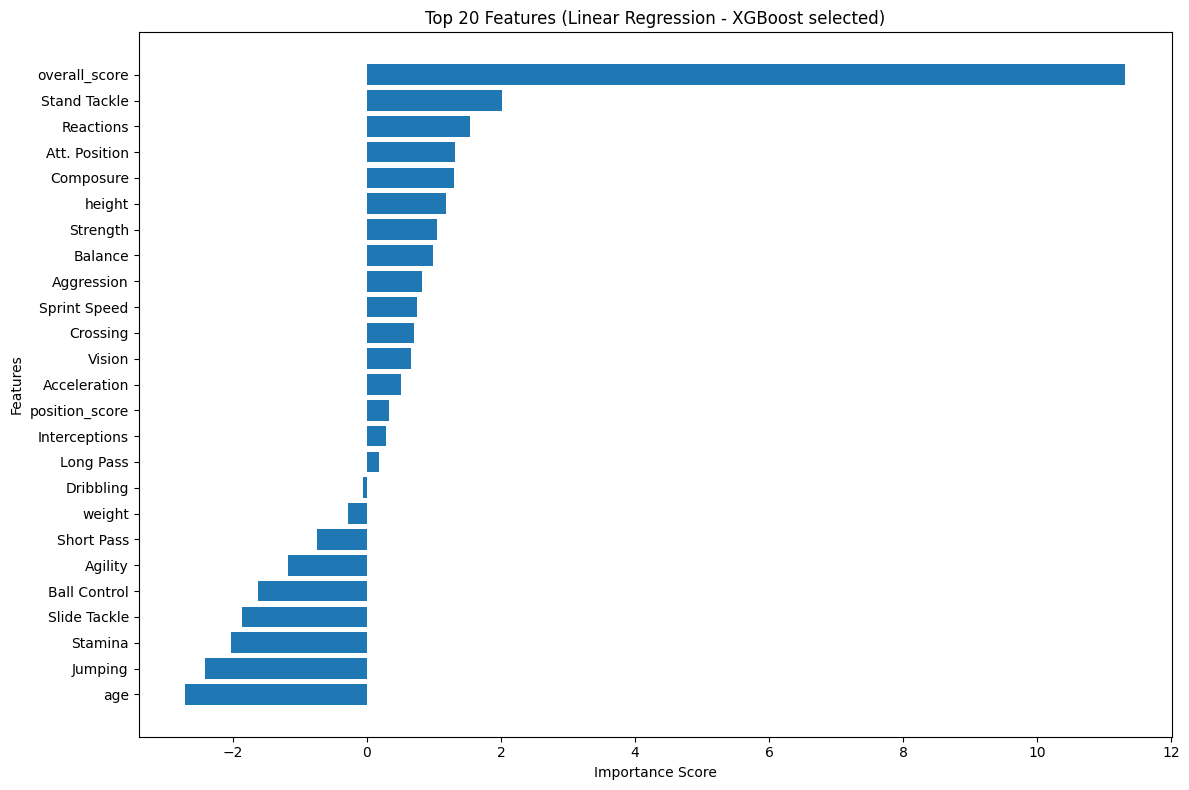

<ipython-input-46-f8f279d6023b>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()],


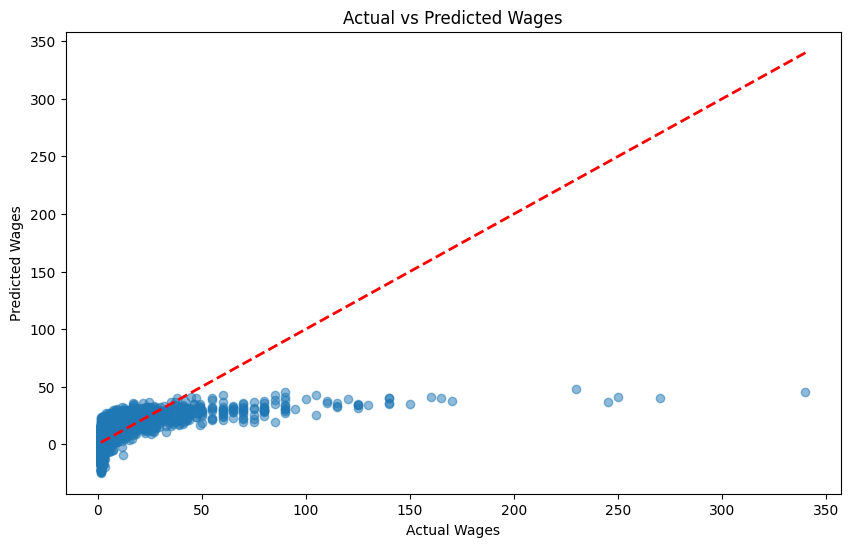

In [ ]:
print("\nTop 20 Features:")
# print(top_features)

# Plot the Top 20 Features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance1['Feature'][::-1], feature_importance1['Coefficient'][::-1])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Features (Linear Regression - XGBoost selected)')
plt.tight_layout()
plt.show()

# Scatter plot of Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2, color='red')
plt.title("Actual vs Predicted Wages")
plt.xlabel("Actual Wages")
plt.ylabel("Predicted Wages")
plt.show()